<a href="https://colab.research.google.com/github/Molly-Abisage/Hass-consulting-Real-estate/blob/master/week_7_IP_Molly_Abisage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HASS CONSULTING COMPANY-REAL ESTATE**

 **DEFINING THE QUESTION**

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

**THE METRIC FOR SUCCESS**

Creating a model that can best predict the prices of houses usind regression models.

**CONTEXT**

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)]. 

**EXPERIMENTAL DESIGN TAKEN**

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Performing regression analysis.

Incorporate categorical independent variables into your models.

Check for multicollinearity


# **DATA PREPARATION AND CLEANING**

**READ AND EXPLORE THE GIVEN DATASET**

In [1]:
#IMPORTING THE LIBRARIES TO BE USED

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import seaborn
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load the dataset

house_data = pd.read_csv('/content/house_data.csv')
house_data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#checking the size

house_data.shape

(21613, 20)

In [4]:
#check the datatypes

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
#checking for duplicates
house_data.duplicated().sum()

3

In [6]:
#remove the duplicates
house_data.drop_duplicates()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
#checking for null values

house_data.isnull().sum()
#no null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#checking the column names
house_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

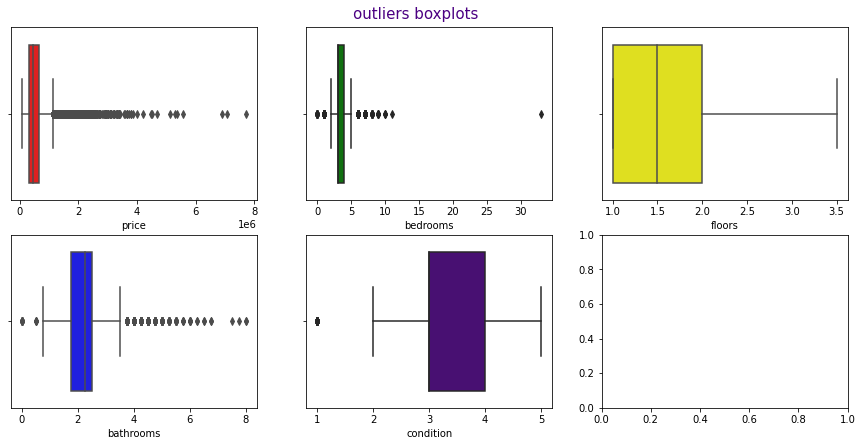

In [10]:
#checking the outliers in the dataset using boxplot
column_list=['price', 'bedrooms', 'floors', 'bathrooms', 'condition']
color = ['red', 'green', 'yellow', 'blue', 'indigo']

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 7))
plt.suptitle('outliers boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax,data, column, color in zip(axes.flatten(), house_data, column_list, color):
  sns.boxplot(house_data[column], ax = ax, color = color)
  ax.set_facecolor('white') 
 

the outliers are important in the dataset since they occupy most of the data and we dont remove them

# **EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

In [11]:
# Lets describe the dataset 

house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [58]:
# let us pick the relevant columns

col=['price', 'bedrooms', 'floors', 'grade', 'condition', 'long', 'lat']
house_data1=house_data[col]
house_data1.head()

,price,bedrooms,floors,grade,condition,long,lat
0,221900.0,3,1.0,7,3,-122.257,47.5112
1,538000.0,3,2.0,7,3,-122.319,47.7210
2,180000.0,2,1.0,6,3,-122.233,47.7379
3,604000.0,4,1.0,7,5,-122.393,47.5208
4,510000.0,3,1.0,8,3,-122.045,47.6168


In [59]:
#checking out the univariate data in the new data: mean,median,range,quartile, kurtosis and skewness
my_col = ['price', 'bedrooms', 'floors', 'grade', 'condition', 'long', 'lat' ]
for i, col_val in enumerate(my_col):
    print("Mean:", house_data1[col_val].mean())
    print("Mode:", house_data1[col_val].mode())
    print("Median:", house_data1[col_val].median())
    print("SD:", house_data1[col_val].std())
    print("Variance:", house_data1[col_val].var())
    print("Quartiles:", house_data1[col_val].quantile([0.25,0.5,0.75]))
    print("Skewness:", house_data1[col_val].skew())
    print("Kurtosis:", house_data1[col_val].kurt())
    print("******")

Mean: 540182.1587933188
Mode: 0    350000.0
1    450000.0
dtype: float64
Median: 450000.0
SD: 367362.23171800975
Variance: 134955009292.83669
Quartiles: 0.25    321950.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64
Skewness: 4.021715573048684
Kurtosis: 34.522444410072566
******
Mean: 3.37084162309721
Mode: 0    3
dtype: int64
Median: 3.0
SD: 0.9300618311474632
Variance: 0.8650150097573724
Quartiles: 0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64
Skewness: 1.97429953543601
Kurtosis: 49.06365318170099
******
Mean: 1.4943089807060566
Mode: 0    1.0
dtype: float64
Median: 1.5
SD: 0.5399888951423824
Variance: 0.29158800687709074
Quartiles: 0.25    1.0
0.50    1.5
0.75    2.0
Name: floors, dtype: float64
Skewness: 0.616176721157611
Kurtosis: -0.4847229368298285
******
Mean: 7.656873178179799
Mode: 0    7
dtype: int64
Median: 7.0
SD: 1.1754587569743042
Variance: 1.3817032893475767
Quartiles: 0.25    7.0
0.50    7.0
0.75    8.0
Name: grade, dtype: float64
S

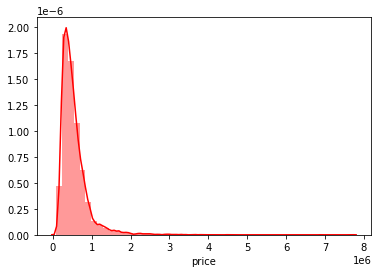

In [14]:
# Ditribution plot for price column

sns.distplot(house_data1['price'], kde= True,color='red')

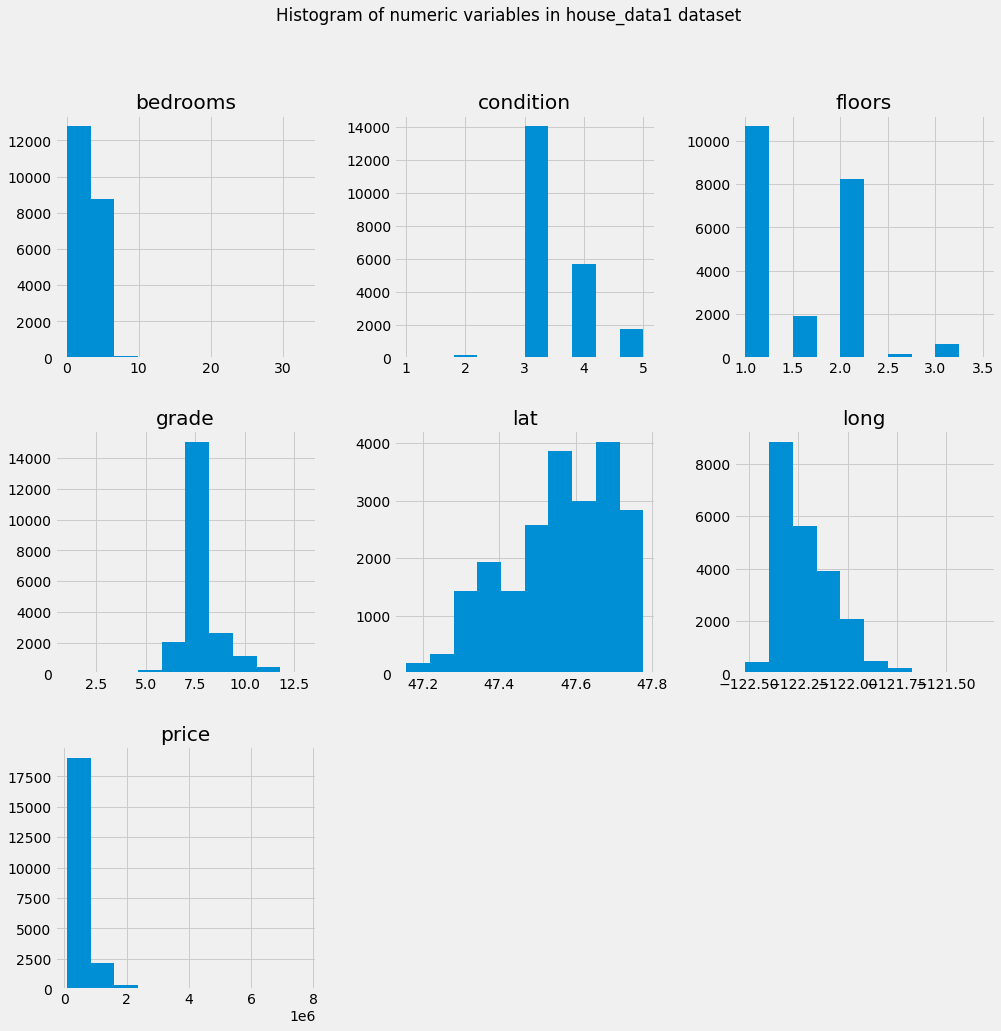

In [60]:
house_data1.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in house_data1 dataset")
plt.savefig('Histogram')
plt.show()

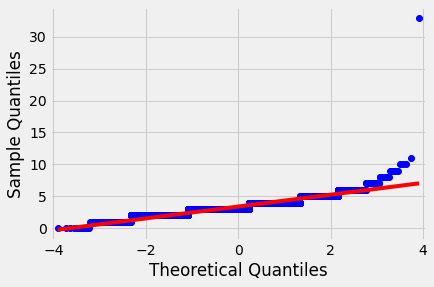

Statistics=0.8490, p=0.0000
Sample does not look Gaussian


In [37]:
#lets plot a Q-Q for bedrooms and bathrooms

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

qqplot(house_data1['bedrooms'], line='s')
pyplot.show()
stat, p = shapiro(house_data1['bedrooms'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

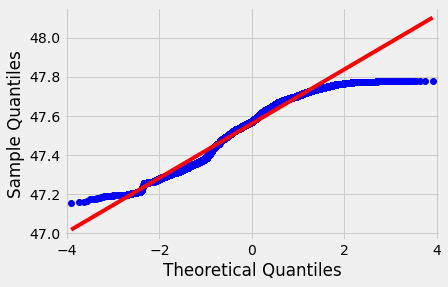

Statistics=0.9566, p=0.0000
Sample does not look Gaussian


In [62]:
#Q-Q for bathrooms
qqplot(house_data1['lat'], line='s')
pyplot.show()
stat, p = shapiro(house_data1['lat'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

**BIVARIATE ANALYSIS**

Text(0.5, 1.0, 'Price vs Floors')

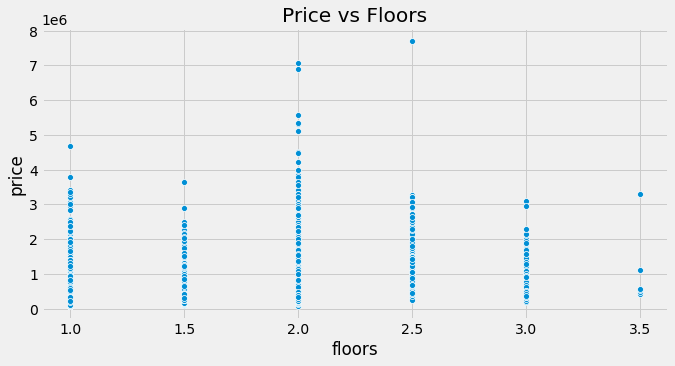

In [40]:
#For bivariate we check the scatterplots to show price vs floors

import matplotlib.style as style

def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (10,5))
    
    ## Plotting target variable with predictor variable()
    sns.scatterplot(y = y, x = x);
customized_scatterplot(house_data1.price, house_data1.floors)
plt.title('Price vs Floors')

Text(0.5, 1.0, 'Price vs bedrooms')

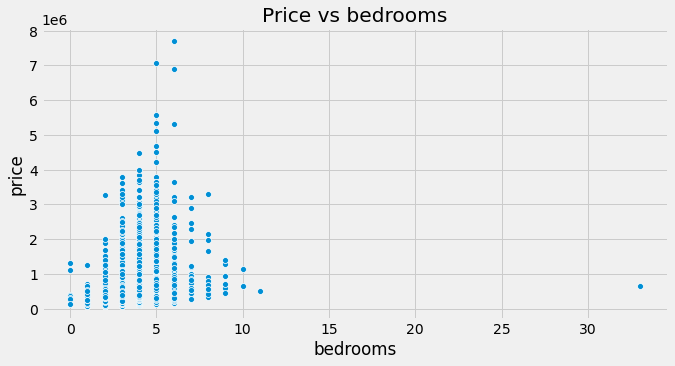

In [41]:
#scatterplot of bedrooms vs prices

customized_scatterplot(house_data1.price, house_data1.bedrooms);
plt.title('Price vs bedrooms')

Text(0.5, 1.0, 'Price vs long')

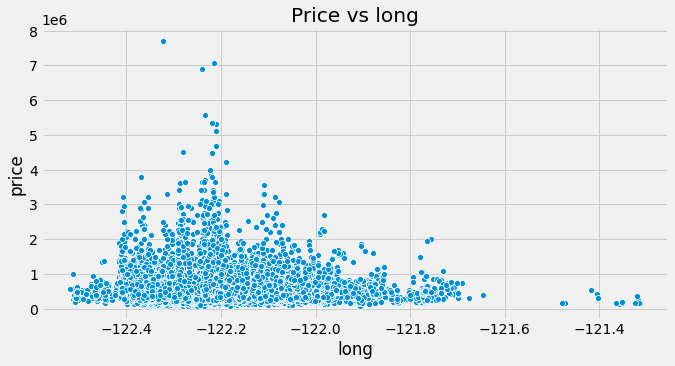

In [63]:
#scatter plot for prices against squarefeet of living room 
customized_scatterplot(house_data1.price, house_data1.long);
plt.title('Price vs long')

Text(0.5, 1.0, 'Price vs condition')

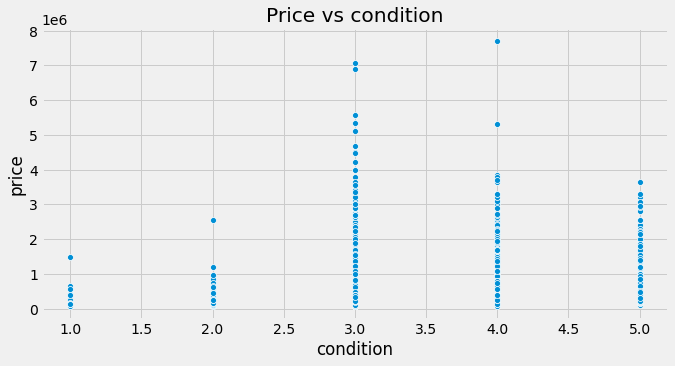

In [20]:
#scatter plot for prices against condition
customized_scatterplot(house_data1.price, house_data1.condition);
plt.title('Price vs condition')

<function matplotlib.pyplot.show>

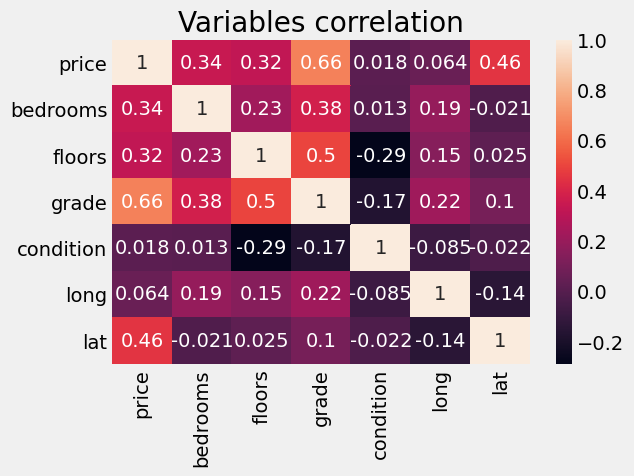

In [64]:
#Checking for correlations between the variables of house_data
plt.figure(dpi=100)
cor=house_data1.corr(method = 'spearman')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.title('Variables correlation')
plt.show

We can see that most of our independent variables are highly correlated.

**MULTICOLLINEARITY**

In [44]:
house_corr = house_data.corr()
house_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


prices correlation is 1, on the diagonal. price and sqft_living is strongly correlated with a 0.7. sqrt_living and sqft_above are strongly correlated with 0.87. a correlation of above 0.25 indicates strong correlation, below 0.5 means a weak or no correlation.

In [27]:
#checking for multicollinearity using VIF
VIF=pd.DataFrame(np.linalg.inv(house_corr.values), index = house_corr.index, columns=house_corr.columns)
VIF

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.028542,0.033760,0.002267,-0.005352,9.295241e-03,0.077219,-0.011600,0.002765,-0.037849,0.022078,-0.048373,1.019747e-02,-1.098595e-02,0.023615,0.017859,0.000315,0.007458,-0.072914,0.009239,0.105511
price,0.033760,3.331694,0.301926,-0.287621,-1.059816e+00,-0.045685,-0.033158,-0.457218,-0.369007,-0.155106,-1.024505,-4.024468e-01,-9.300384e-02,0.699138,-0.071608,0.282609,-0.757054,0.272064,-0.134388,0.098140
bedrooms,0.002267,0.301926,1.679425,-0.487234,-2.914374e-01,0.045161,0.046698,0.021795,0.080697,-0.064841,0.214235,-7.339783e-01,-3.968862e-01,0.197843,0.038950,0.105724,-0.017829,0.042108,0.013026,0.094213
bathrooms,-0.005352,-0.287621,-0.487234,3.375628,-4.983419e+00,-0.020368,-0.672186,0.049214,-0.009708,-0.123686,-0.179471,3.339955e+00,1.373944e+00,-0.996174,-0.253644,0.017405,0.024363,0.030747,0.103709,0.062751
sqft_living,0.009202,-1.054373,-0.288261,-4.978829,-3.384707e+13,-0.106878,0.527039,0.597696,-0.479097,-0.315069,-0.453843,3.051743e+13,1.631011e+13,1.445337,0.088412,-0.235969,0.262880,-0.210571,-0.942696,-0.214327
sqft_lot,0.077219,-0.045685,0.045161,-0.020368,-1.071586e-01,2.109017,0.044866,0.034139,-0.056515,0.034475,-0.042674,-8.142180e-02,1.746460e-02,0.090425,0.023829,-0.006678,0.064889,-0.142610,0.166587,-1.452768
floors,-0.011600,-0.033158,0.046698,-0.672186,5.283104e-01,0.044866,2.012361,-0.000812,-0.036580,0.090957,-0.220239,-9.665754e-01,3.676039e-01,-0.488619,-0.080094,-0.173551,-0.120268,0.162189,0.273838,0.070537
waterfront,0.002765,-0.457218,0.021795,0.049214,5.972879e-01,0.034139,-0.000812,1.266565,-0.442151,0.008786,0.189562,-4.636230e-01,-2.087473e-01,-0.116876,-0.055442,-0.016250,0.113898,-0.010443,0.072970,-0.031186
view,-0.037849,-0.369007,0.080697,-0.009708,-4.781436e-01,-0.056515,-0.036580,-0.442151,1.477161,-0.005080,-0.070505,6.198854e-01,4.047917e-02,0.073637,-0.032922,-0.171895,0.201833,0.043886,-0.311082,-0.021830
condition,0.022078,-0.155106,-0.064841,-0.123686,-3.142170e-01,0.034475,0.090957,0.008786,-0.005080,1.257240,-0.007632,4.023978e-01,8.181785e-02,0.529381,0.210433,0.148053,0.099266,-0.021435,0.082361,-0.030419


In [29]:
# This function will calculate VIF and drop highly correlated variables

from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh):
  cols = X.columns
  variables = np.arange(X.shape[1])
  dropped=True
  while dropped:
      dropped=False
      c = X[cols[variables]].values
      vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
      maxloc = vif.index(max(vif))
      if max(vif) > thresh:
          print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
          variables = np.delete(variables, maxloc)
          dropped=True
  print('Remaining variables:')
  print(X.columns[variables])
  return X[cols[variables]]

In [46]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = True)
model1.fit(X, y)

y_pred1 = model1.predict(X)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X, y)))

Mean squared error: 65401760052.79
Variance score: 0.52


bartlett's test establishes a null hypothesis that the variance is equal for all our datapoints, and the alternate hypothesis that the variance is different for at least one pair of datapoints.

# **MODELLING**

**LINEAR REGRESSION**

In [65]:
# Subsetting the data
X = house_data1[['bedrooms', 'floors', 'grade', 'condition', 'lat', 'long' ]]
y = house_data1['price']

In [66]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [67]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# coefficients for our test set attributes.  

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,30723.575793
floors,-26339.145915
grade,207539.496117
condition,65487.086584
lat,587302.473465
long,-189847.533973


In [69]:
#lets make predictions compared side by side with the actual expected values

y_pred = regressor.predict(X_test)

# To compare the  output values (without sqft_living and sqft_above)
# 
price_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
price_df

,Actual,Predicted
957,323000.0,2.965255e+05
14143,690000.0,4.845840e+05
19452,142000.0,-1.170788e+06
20510,560000.0,6.062524e+05
18354,545000.0,3.029679e+05
...,...,...
5349,386591.0,5.120106e+05
11082,344950.0,6.063553e+05
4413,1150000.0,1.002866e+06
17461,622200.0,4.795831e+05


In [70]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

residuals.mean()

              price
count  4.323000e+03
mean  -1.012093e+04
std    2.718586e+05
min   -5.898294e+06
25%   -9.182808e+04
50%    2.634274e+04
75%    1.248489e+05
max    6.638346e+05


-10120.931190254063

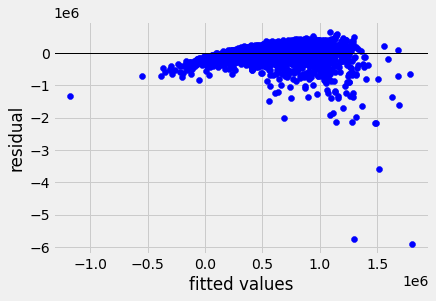

In [71]:
# a plot to find the residual plot
plt.scatter(y_pred, residuals, color='Blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

its is observed that the mean is centered around 0 and most of our data is close to this value but we do have some on the negative side that are far from this mean. To find if there are any patterns in the data we perfom a heteroskedasticity test.

In [72]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

4399.394783581041
0.20194755378187207
the variances are homogeneous!


**QUANTILE REGRESSION**

In [84]:
# prepare the quantile that we want to work with
#quantile reg
import statsmodels.formula.api as smf

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', house_data1)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3576
Model:                       QuantReg   Bandwidth:                   2.410e+04
Method:                 Least Squares   Sparsity:                    3.240e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21613
Time:                        10:23:14   Df Residuals:                    21606
                                        Df Model:                            6
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.381e+07   1.01e+06    -33.531      0.000   -3.58e+07   -3.18e+07
X[0]        2.828e+04   1278.379     22.120      0.000    2.58e+04    3.08e+04
X[1]        8450.3190   2358.011      3.584      0.000    3828.444    1.31e+04
X[2]        1.365e+05   1133.184    120.481      0.0

In [87]:
res1 = mod.fit(q = 0.25)
res3 = mod.fit(q = 0.5)
res4 = mod.fit(q = 0.75)

# display the results 
print("25th Percentile: ", res1.summary(), '\n***************\n')
print("\n50th Percentile: ", res3.summary(), '\n***************\n')
print("\n75th Percentile: ", res4.summary())

25th Percentile:                           QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3329
Model:                       QuantReg   Bandwidth:                   2.125e+04
Method:                 Least Squares   Sparsity:                    3.158e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21613
Time:                        10:27:34   Df Residuals:                    21606
                                        Df Model:                            6
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.572e+07   8.33e+05    -18.868      0.000   -1.74e+07   -1.41e+07
X[0]        2.445e+04   1131.215     21.615      0.000    2.22e+04    2.67e+04
X[1]        6680.1388   2109.536      3.167      0.002    2545.292    1.08e+04
X[2]        1.119e+05    858.776  

Quantile regression is not useful when their coefficients are almost similar to the multiple linear regression.

ALGORITHM EVALUATION

In [90]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 157304.4569208007
Mean Squared Error: 73992413389.70203
Root Mean Squared Error: 272015.4653502297


In [91]:
#R2 score
from sklearn.metrics import r2_score
q = r2_score(y_test, y_pred)
q


0.4941359343595876

we have an accuracy of  49.41%

**RIDGE REGRESSION**

In [92]:
#LETS IMPORT

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [93]:
# predictors and predicted features

x = house_data1[['bedrooms', 'floors', 'grade', 'condition', 'lat', 'long']]
y = house_data1['price']

In [94]:
# Splitting the dataset into training and testing sets
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [95]:
# Creating our baseline regression model
# This is a model that has no regularization
# 
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)
first_model = (mean_squared_error(y_test, y_pred))

print(first_model)

69886559134.27654


In [96]:
# determining the most appropriate value for the l2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [99]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x_train,y_train)
print(search.best_params_)

print(search.best_score_)

{'alpha': 0.0001}
-61573178717.73845


In [100]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(x_train,y_train)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(x_test)))
print(second_model)

69881767189.9768


In [102]:
# Making predictions
#
y_pred = ridge.predict(x_test)
y_pred
# To compare the actual output values for P_test with the predicted values
# 
r = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
r

,Actual,Predicted
957,323000.0,2.956665e+05
14143,690000.0,4.840009e+05
19452,142000.0,-1.171911e+06
20510,560000.0,6.091984e+05
18354,545000.0,3.012873e+05
...,...,...
6939,800000.0,6.160179e+05
19910,430000.0,2.591150e+05
20466,750000.0,8.665151e+05
14961,1480000.0,1.025887e+06


In [103]:
# CHecking accuracy using R2 score


from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
r

0.5035453381757456

Ridge regression model is 50.35% accurate

**LASSO REGRESSION**

In [109]:

m = house_data1.drop(['price'], axis=1)
n = house_data1['price']
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size = 0.2, random_state = 100)

regressor = LinearRegression()
regressor.fit(m,n)
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(m)
X_= scaler.transform(m)

In [110]:
# Creating lasso object
# 
from sklearn import linear_model
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(m, n) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(m, n)) 
print("lasso MSE:", mean_squared_error(n, lasso.predict(m))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.5289222022761232
lasso MSE: 63571367084.78601
lasso coef: [  34687.83731804  -20647.0971399   204863.46494298   65669.84211772
 -190318.82124195  599857.533572  ]


In [111]:
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(m_train, n_train) 
linear.fit(m_train, n_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(m_test, n_test))
print("linear score:", linear.score(m_test, n_test)) 
print("lasso MSE:", mean_squared_error(n_test, gridlasso.predict(m_test)))
print("linear MSE:", mean_squared_error(n_test, linear.predict(m_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.5292371935303516
linear score: 0.5292382459437718
lasso MSE: 66832723408.542564
linear MSE: 66832574000.70053
lasso best estimator coef: [  36761.92193941  -16551.06130556  201743.22789068   68972.07023821
 -187241.38543137  601638.67025157]
linear coef: [  36806.4995282   -16655.59191768  201782.68487155   68992.74958773
 -188338.82293009  602725.64440459]


the basemodel MSE is 66832574000.70053  and after applying Lasso it has reduced to 66832723408.542564

when predictors are highly correlated, lasso picks only one of them and shrinks the others to zero.




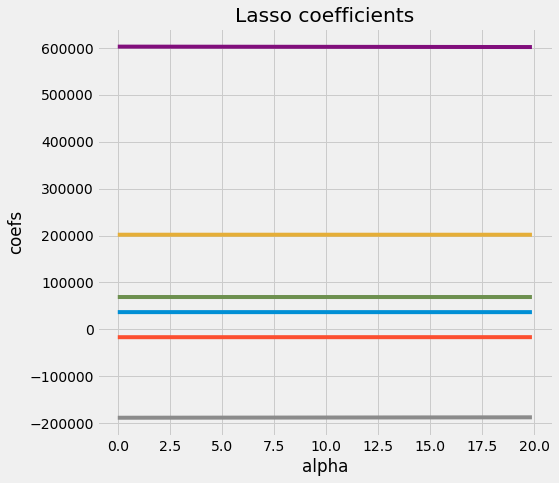

In [112]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(m_train, n_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

**ELASTIC NET REGRESSION**

In [115]:
p = house_data1.drop(['price'], axis=1)
q = house_data1['price']

# Creating our linear regression model for the purpose of comparison
# we will use this MSE TO compare with elastic net
regression=LinearRegression()
regression.fit(p,q)
first_model=(mean_squared_error(y_true=q,y_pred=regression.predict(p)))
print(first_model) 


63571366984.99258


In [116]:
#checking the baseline
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,p.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': 34689.59631174431,
 'condition': 65670.70973286456,
 'floors': -20651.412336534355,
 'grade': 204865.17250730866,
 'lat': 599902.5981765736,
 'long': -190365.06865277226}

In [117]:
#  we need to do is create our grid.
# 
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [118]:
# thereafter we fit the model to create best parameters
search.fit(p,q)
search.best_params_
abs(search.best_score_)

64065510429.938

This shows that my base model MSE is lower than the best score by Elastic net regression.

**CHALLENGING THE SOLUTION AND CONCLUSION**


1.The bathrooms and floors had float type datatypes, i did not change these data types.From extensive research on houses i found that - Number of bathrooms, where 0.5 accounts for a room with a toilet but no shower

2.The MSE's for the four models are quite huge. No outliers or anomalies were removed, and also the high variance seen.


IN CONCLUSION, we can observe that  lasso and Quantile regression perform a bit better in terms of MSEs